In [1]:
%matplotlib inline
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import re

import torch

from IPython.display import display, Image

import pandas as pd

In [2]:
from output_utils import *

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
pathpattern = 'results/*/*/*/*/'
runs = getruns(pathpattern=pathpattern)
runsdf = pd.DataFrame(runs)
runsdf.sort_values('dir')

,train,test,epochs,task,model,lateral,thirdphase,randomsign,activation,betas,lat-init,load,dir,callline
2,9.92,11.35,1,[MNIST],[LatMLP],[],[],[],[mysig],"[(0.0, 0.1)]",[],[],results/EP/cel/2023-06-21/12-25-48_gpu1/,main.py --model LatMLP --task MNIST --archi 78...
1,82.22,87.41,1,[MNIST],[MLP],[],[],[],[mysig],"[(0.0, 0.1)]",[],[],results/EP/cel/2023-06-21/12-26-24_gpu1/,main.py --model MLP --task MNIST --archi 784 5...
0,85.12,81.27,1,[MNIST],[MLP],[],[],[],[mysig],"[(0.0, 0.1)]",[],[],results/EP/cel/2023-07-05/16-28-08_gpu0/,main.py --model MLP --task MNIST --archi 784 5...
3,78.39,81.13,5,[MNIST],[CNN],[],[],[],[hard_sigmoid],"[(0.0, 0.4)]",[],[],results/EP/cel/2023-07-10/11-36-41_gpu1/,main.py --model CNN --task MNIST --channels 32...
4,90.00,91.02,2,[MNIST],[LatMLP],[],[],[],[mysig],"[(0.0, 0.1)]",[],[],results/EP/mse/2023-06-21/11-47-15_gpu1/,main.py --model LatMLP --task MNIST --archi 78...
5,89.92,90.47,2,[MNIST],[LatMLP],[],[],[],[mysig],"[(0.0, 0.1)]",[],[],results/EP/mse/2023-06-21/15-09-23_gpu1/,main.py --model LatMLP --task MNIST --archi 78...
7,34.58,68.20,1,[MNIST],[MLP],[],[],[],[mysig],"[(0.0, 0.1)]",[],[],results/EP/mse/2023-06-21/15-14-31_gpu1/,main.py --model MLP --task MNIST --archi 784 5...
6,90.93,92.85,2,[MNIST],[LatMLP],[],[],[],[mysig],"[(0.0, 0.1)]",[],[],results/EP/mse/2023-06-21/15-18-05_gpu1/,main.py --model LatMLP --task MNIST --archi 78...
15,96.66,96.99,2,[MNIST],[MLP],[],[],[],[mysig],"[(0.0, 0.1)]",[],[],results/EP/mse/2023-07-06/09-23-38_gpu0/,main.py --model MLP --task MNIST --archi 784 5...
16,96.55,96.97,2,[MNIST],[MLP],[],[],[],[mysig],"[(0.0, 0.1)]",[],[],results/EP/mse/2023-07-06/10-32-24_gpu0/,main.py --model MLP --task MNIST --archi 784 5...


In [165]:
for cl in runsdf['callline']:
    if 'load-path' in cl: print(cl) 

main.py --model LateralCNN --task CIFAR10 --channels 128 256 512 --kernels 3 3 3 --pools mmm --strides 1 1 1 --paddings 0 0 0 --fc 10 --optim adam --lrs 5e-5 5e-5 1e-5 7e-6 --epochs 10 --act mysig --todo train --betas 0.0 0.1 --T1 100 --T2 10 --mbs 128 --thirdphase --loss cel --device 0 --seed 0712 --load-path-convert results/EP/cel/2023-07-12/22-23-57_gpu0/ --lat-layers 1 2 --lat-init-zeros --use-lateral --save --lat-lrs 7e-5 8e-5 

main.py --model LateralCNN --task CIFAR10 --channels 128 256 512 --kernels 3 3 3 --pools mmm --strides 1 1 1 --paddings 0 0 0 --fc 10 --optim adam --lrs 5e-5 5e-5 1e-5 7e-6 --epochs 10 --act mysig --todo train --betas 0.0 0.1 --T1 100 --T2 10 --mbs 128 --thirdphase --loss cel --device 0 --seed 0712 --load-path-convert results/EP/cel/2023-07-12/22-23-57_gpu0/ --lat-layers 1 2 --lat-init-zeros --save 

main.py --model LateralCNN --task CIFAR10 --channels 128 256 512 --kernels 3 3 3 --pools mmm --strides 1 1 1 --paddings 0 0 0 --fc 10 --optim adam --lrs 5e-5 

In [10]:
# fig, axs = plt.subplots(1, 3, figsize=(20,10))
def showtest(path, test):
    with open(path + test + 'hyperparameters.txt', 'r') as paramfile:
#         print(test)
        callline = paramfile.readline()
        print(callline)
        modelname = str(modelre.search(callline).groups())
        print(modelname + (' softmax' if '--softmax' in callline else ''))
#         img = mpimg.imread(path + test + 'train-test_acc.png')
#         imgplot = axs[i].imshow(img)
#         axs[i].set_title(modelname + (' softmax' if '--softmax' in callline else ''))
        display(Image(filename=path + test + 'train-test_acc.png'))

In [11]:
modelre = re.compile('--model (\w+)')

In [12]:
path = 'results/EP/cel/2023-07-11/'
test = '20-58-09_gpu0/'
# pathcel = 'results/EP/cel/2023-07-10/'
# testscel = ["19-20-09_gpu0/", "19-55-15_gpu0/", "20-12-47_gpu0/"]
# pathmse = 'results/EP/mse/2023-07-10/'
# testsmse = ['19-37-45_gpu0/', '19-55-16_gpu0/', '20-12-47_gpu0/']

main.py --model LatSoftCNN --task MNIST --channels 32 64 --kernels 5 5 --pools mm --strides 1 1 --fc 10 --optim adam --lrs 5e-5 1e-5 8e-6 --epochs 10 --act mysig --todo train --betas 0.0 0.4 --T1 100 --T2 10 --mbs 100 --device 0 --loss cel --seed 1432 --thirdphase --save --use-lateral --lat-lrs 1e-5 

('LatSoftCNN',)


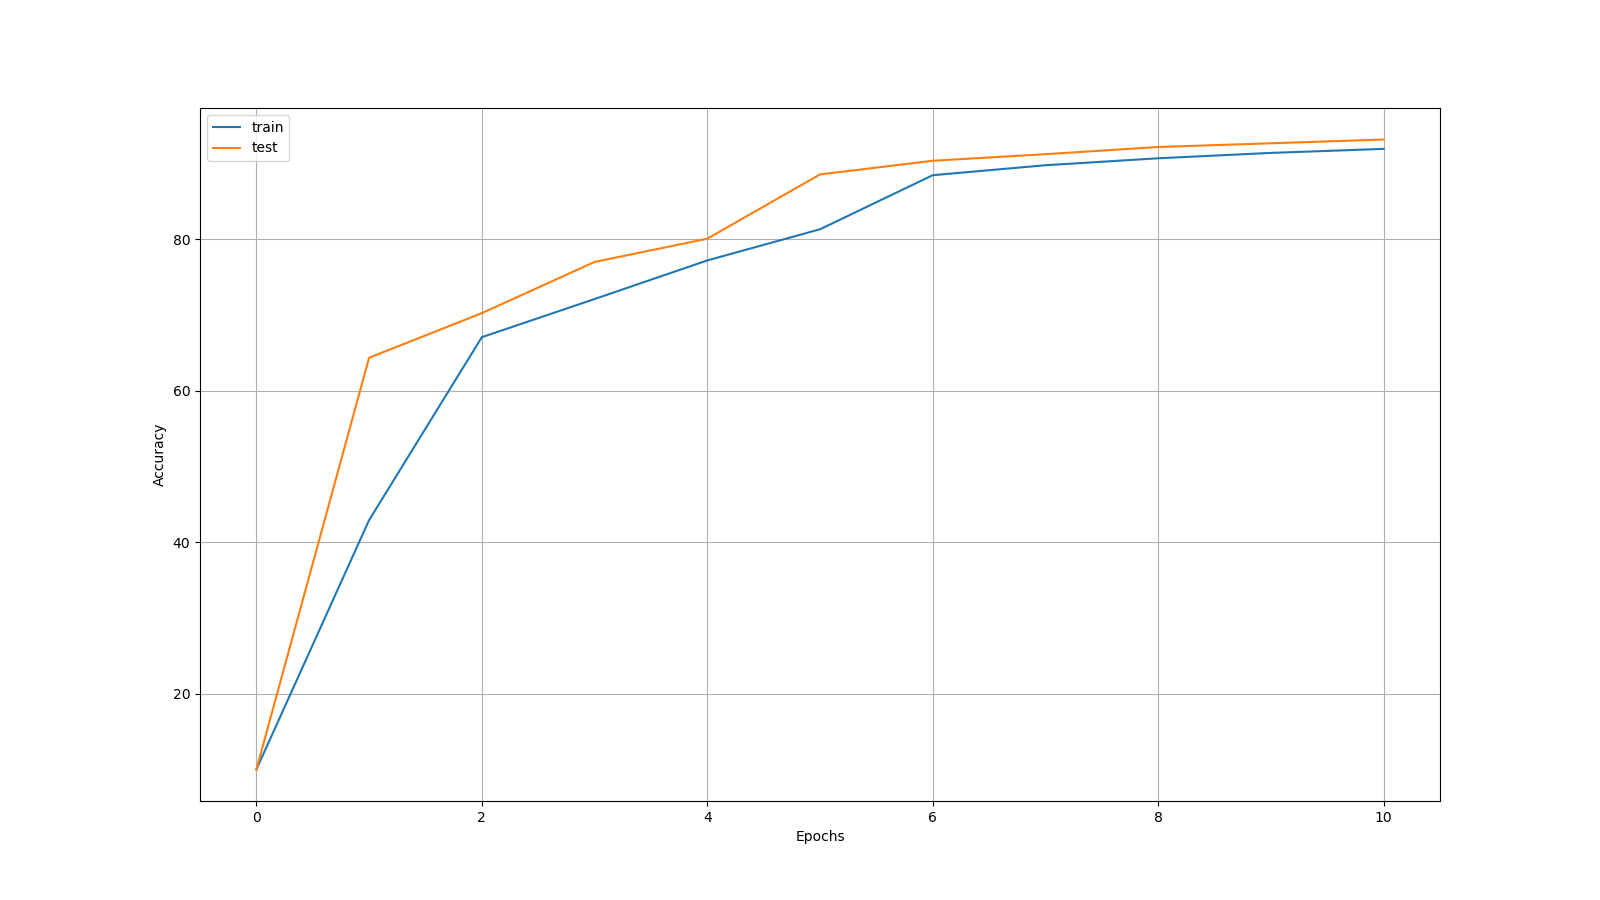

In [13]:
showtest(path, test)

In [14]:
import torch

In [15]:
model = torch.load(path + test+ 'model.pt')

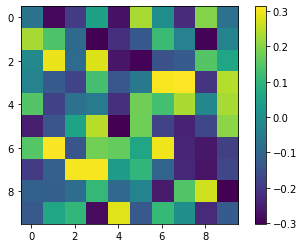

In [16]:
plt.figure()
plt.imshow(model.lat_syn[0].weight.data.cpu())
plt.colorbar()
plt.show()

In [17]:
model = torch.load(path + test+ 'model.pt')

In [18]:
path = 'results/EP/cel/2023-07-12/'
test = '10-56-47_gpu0/'

main.py --model CNN --task MNIST --channels 32 64 --kernels 5 5 --pools mm --strides 1 1 --fc 10 --optim adam --lrs 5e-5 1e-5 8e-6 --epochs 10 --act mysig --todo train --betas 0.0 0.4 --T1 100 --T2 10 --mbs 100 --device 0 --loss cel --seed 1432 --thirdphase --save --use-lateral --lat-lrs 1e-5 

('CNN',)


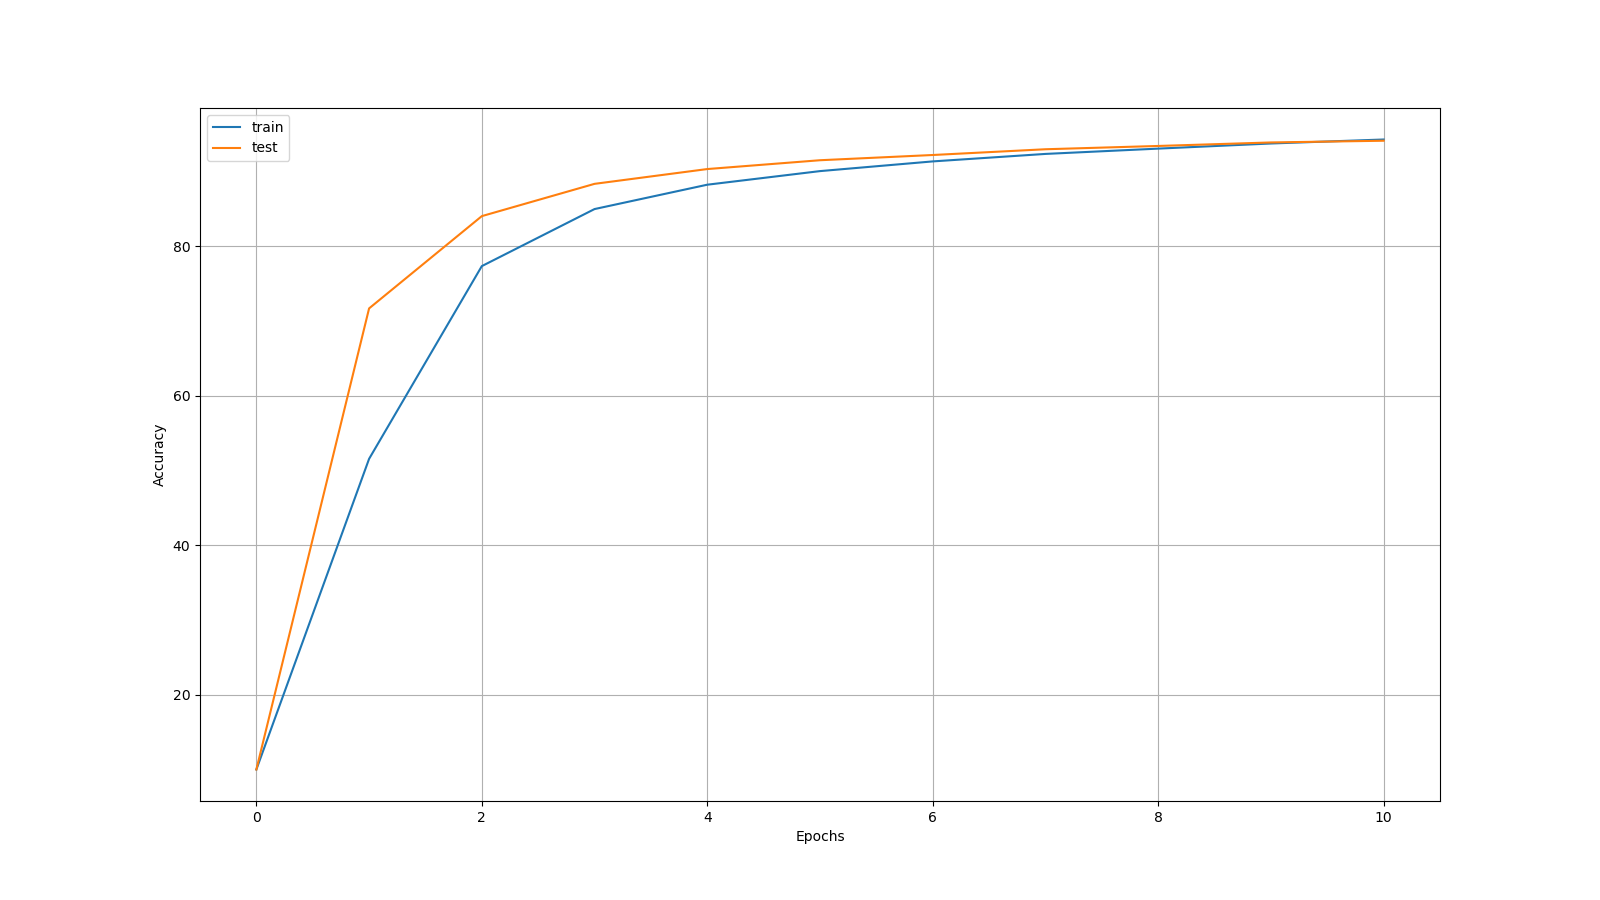

In [19]:
showtest(path, test)

In [20]:
path = 'results/EP/cel/2023-07-12/'
test = '12-45-57_gpu0/'

main.py --model CNN --task MNIST --channels 32 64 --kernels 5 5 --pools mm --strides 1 1 --fc 10 --optim adam --lrs 5e-5 1e-5 8e-6 --epochs 10 --act mysig --todo train --betas 0.0 0.4 --T1 100 --T2 10 --mbs 100 --device 0 --loss cel --seed 1432 --thirdphase --save --softmax 

('CNN',) softmax


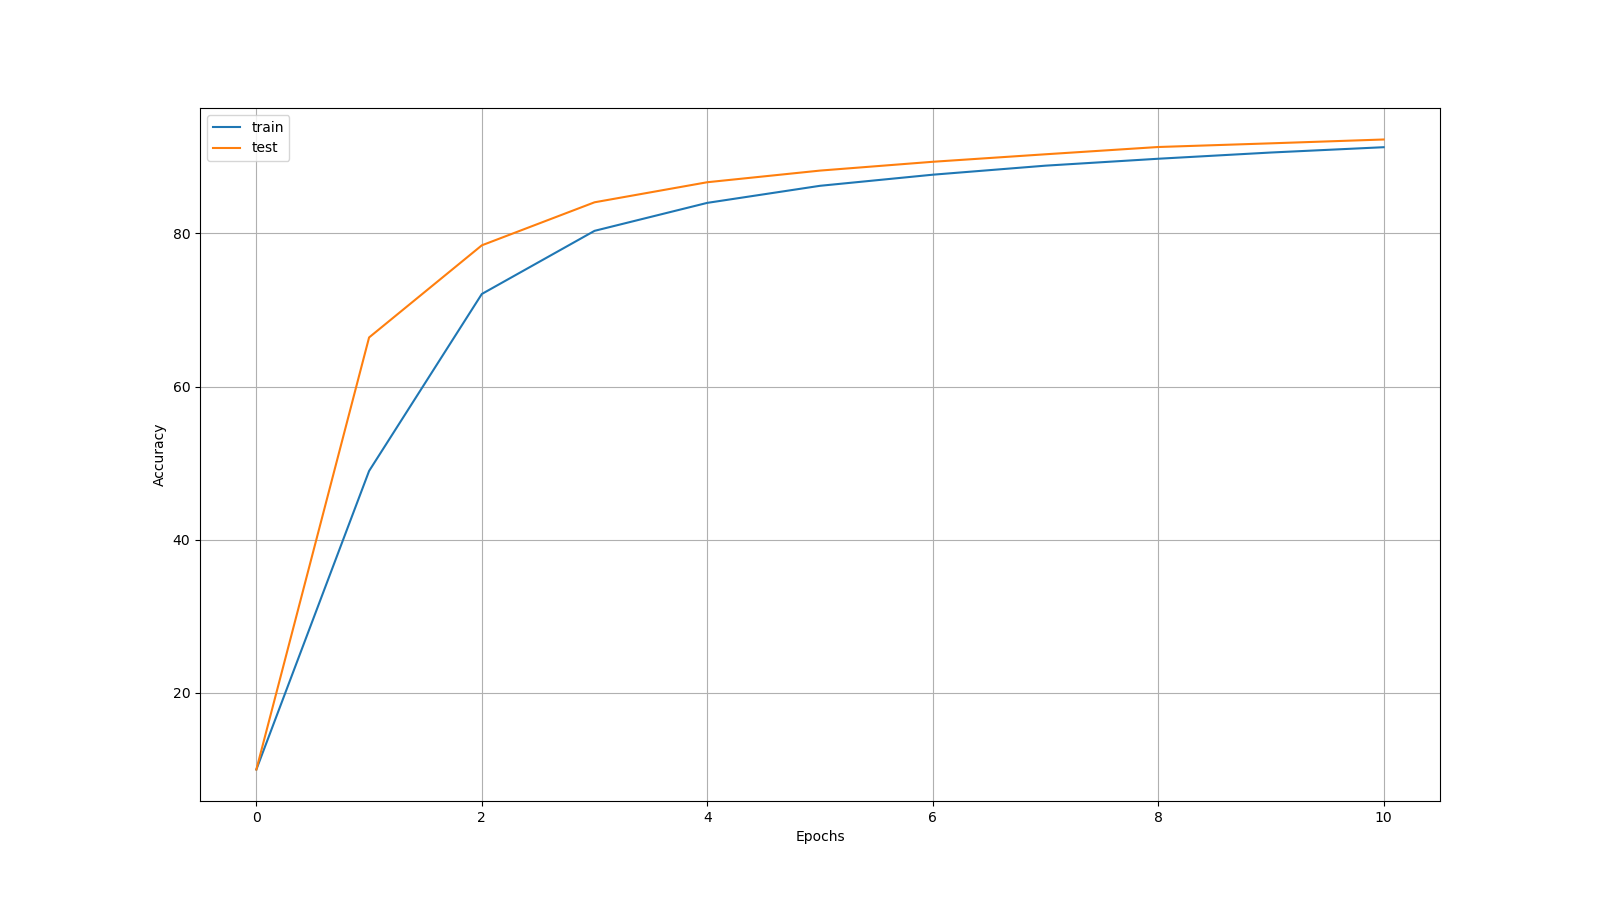

In [21]:
showtest(path, test)

# visualize features by hallucinating
run network backwards, letting it find an optimal input while clamping/stimulating a given output logit

In [892]:
phi = model.Phi(hallucx, stimulus, neurons, beta, torch.nn.MSELoss(reduction='none'))

In [893]:
init_grads = torch.tensor([1 for i in range(mbs)], dtype=torch.float, device=device, requires_grad=True)
hallucx.size(), init_grads.size(), [n.size() for n in neurons]

(torch.Size([2, 1, 28, 28]),
 torch.Size([2]),
 [torch.Size([2, 32, 12, 12]), torch.Size([2, 64, 4, 4]), torch.Size([2, 10])])

In [894]:
grads = torch.autograd.grad(phi, [hallucx] + neurons, grad_outputs=init_grads, create_graph=False)

RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.

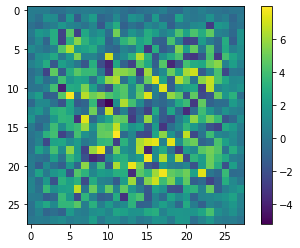

In [895]:
plt.imshow(grads[0][1][0].data.cpu())
plt.colorbar()

In [896]:
import torch.nn.functional as F

In [996]:
  def Phi(model, x, y, neurons, beta, criterion, use_lat=False):

        mbs = x.size(0)
        conv_len = len(model.kernels)
        tot_len = len(model.synapses)

        layers = [x] + neurons
        phi = 0.0

        #Phi computation changes depending on softmax == True or not
        for idx in range(conv_len):
            phi += torch.sum( model.pools[idx](model.synapses[idx](layers[idx])) * layers[idx+1], dim=(1,2,3)).squeeze()


        if not model.softmax:
            for idx in range(conv_len, tot_len):
                phi += torch.sum( model.synapses[idx](layers[idx].view(mbs,-1)) * layers[idx+1], dim=1).squeeze()

            if use_lat:
                # apply competitive lateral connection to readout classification layer for softmax-like behaviour
                phi += torch.sum( model.lat_syn[0](layers[-1]) * layers[-1], dim=1 ).squeeze()

            if beta!=0.0:
#                 if criterion.__class__.__name__.find('MSE')!=-1:
#                     y = F.one_hot(y, num_classes=model.nc)
#                     L = 0.5*criterion(layers[-1].float(), y.float()).sum(dim=1).squeeze()
#                 else:
                L = criterion(layers[-1].float(), y).squeeze()
                phi -= beta*L

        else:
            # the output layer used for the prediction is no longer part of the system ! Summing until len(model.synapses) - 1 only
            for idx in range(conv_len, tot_len-1):
                layeridx = idx + heads
                phi += torch.sum( model.synapses[idx](layers[layeridx].view(mbs,-1)) * layers[layeridx+1], dim=1).squeeze()

            # the prediction is made with softmax[last weights[penultimate layer]]
            if beta!=0.0:
                L = criterion(model.synapses[-1](layers[-1].view(mbs,-1)).float(), y).squeeze()
                phi -= beta*L

        return phi


In [997]:
mbs = 2
device = torch.device(0)
beta = torch.tensor(0.0)
beta = beta.to(device)

In [1189]:
def hallucinate(model, x, y, neurons, T, criterion=torch.nn.MSELoss(reduction='none')):
    beta = 1.0e9
    print(y, beta)
    for t in range(T):
        phi = Phi(model, x, y, neurons, beta, criterion)
        phi -= 1.4*x.norm(1)#**2
        init_grads = torch.tensor([1 for i in range(mbs)], dtype=torch.float, device=device, requires_grad=True)
        grads = torch.autograd.grad(phi, [x] + neurons, grad_outputs=init_grads, create_graph=False)
#         gradx = torch.autograd.grad(phi, x, grad_outputs=init_grads, create_graph=False)
        
        x = model.activation(grads[0])
        x.requires_grad = True
        for idx in range(len(neurons)-1):
            neurons[idx] = model.activation( grads[idx+1] )
            neurons[idx].requires_grad = True

        if False:# not_mse and not(model.softmax):
            neurons[-1] = grads[-1]
        else:
            neurons[-1] = model.activation( grads[-1] )
        neurons[-1].requires_grad=True
#         neurons[-1] = stimulus
#         neurons[-1].requires_grad = True

    return x, neurons


In [1552]:
def forwardmutatex(model, x, y, neurons, T, beta=0.0, criterion=torch.nn.CrossEntropyLoss(reduction='none')):
    clampx = copy(x)
    for t in range(T):
        phi = Phi(model, x, y, neurons, beta, criterion)
        phi -= 1.5*x.norm(1)#**2 # without the norm term, the model tends to completely saturate the input to maximize phi
#         print(mask.size(), clampx.size(), x.size(), phi.size())
        phi -= 100.0*(mask * (clampx - x)**2).sum()

        init_grads = torch.tensor([1 for i in range(mbs)], dtype=torch.float, device=device, requires_grad=True)
        grads = torch.autograd.grad(phi, [x] + neurons, grad_outputs=init_grads, create_graph=False)
        
        x = model.activation(grads[0])
        x.requires_grad = True
        for idx in range(len(neurons)-1):
            neurons[idx] = model.activation( grads[idx+1] )
            neurons[idx].requires_grad = True

        if False:# not_mse and not(model.softmax):
            neurons[-1] = grads[-1]
        else:
            neurons[-1] = model.activation( grads[-1] )
        neurons[-1].requires_grad=True
#         neurons[-1] = stimulus
#         neurons[-1].requires_grad = True
#         x = model.activation(x+clampx)
#         x.requires_grad = True
        

    return x, neurons


In [1190]:
criterion = torch.nn.CrossEntropyLoss(reduction='none')
stimulus = 1.0e-5*torch.ones((mbs,model.nc), device=device)
stimulus[0,3] = 9.0e-1
stimulus[1,7] = 9.0e-1
# stimulus[0,4] = 9.0
# stimulus[0,3] = 9.0
# stimulus[1,5] = 1.0

In [1191]:
# criterion = torch.nn.MSELoss(reduction='none')
# stimulus = torch.Tensor([3, 7])
# stimulus = stimulus.to(torch.int64).to(device)

In [1192]:
neurons = model.init_neurons(mbs, device)
[n.size() for n in neurons]

[torch.Size([2, 32, 12, 12]), torch.Size([2, 64, 4, 4])]

In [1193]:
hallucx = torch.rand((mbs,model.channels[0],model.in_size,model.in_size), device=device, requires_grad=True)

In [1194]:
hallucx, neurons = hallucinate(model, hallucx, stimulus, neurons, 30, criterion)

tensor([[1.0000e-05, 1.0000e-05, 1.0000e-05, 9.0000e-01, 1.0000e-05, 1.0000e-05,
         1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05],
        [1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05,
         1.0000e-05, 9.0000e-01, 1.0000e-05, 1.0000e-05]], device='cuda:0') 1000000000.0


<BarContainer object of 10 artists>

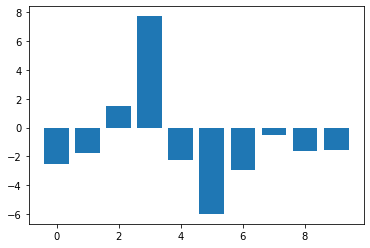

In [1195]:
out = model.synapses[-1](neurons[-1].view(mbs,-1))[0]
plt.bar(range(model.nc), out.data.cpu())

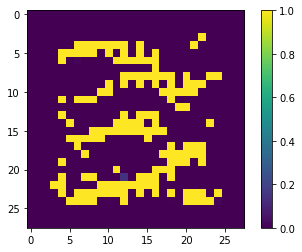

In [1196]:
plt.figure()
plt.imshow(hallucx.data.cpu()[0][0])#) - hallucx.data.cpu()[1][0])
plt.colorbar()
plt.show()

<BarContainer object of 10 artists>

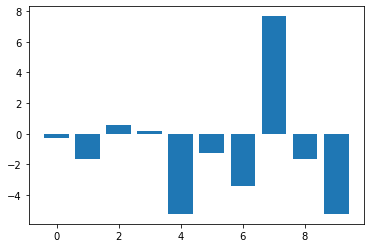

In [1197]:
out = model.synapses[-1](neurons[-1].view(mbs,-1))[1]
plt.bar(range(model.nc), out.data.cpu())

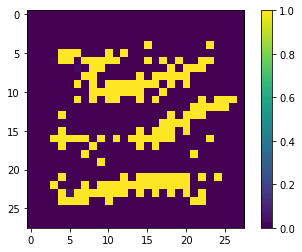

In [1198]:
plt.figure()
plt.imshow(hallucx.data.cpu()[1][0])
plt.colorbar()
plt.show()

<BarContainer object of 10 artists>

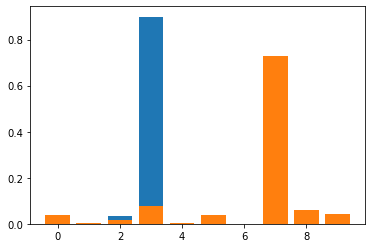

In [1199]:
y = torch.zeros((mbs, 10))
neurons = model.init_neurons(mbs, device)
backneurons = model(hallucx, y, neurons, 100, beta=0.0)
out = F.softmax(model.synapses[-1](backneurons[-1].view(mbs,-1)), dim=1)
plt.bar(range(model.nc), out[0].data.cpu())
plt.bar(range(model.nc), out[1].data.cpu())

# this model is incredibly not robust!
just random noise will make it extremely confident about a random class!m

In [1192]:
neurons = model.init_neurons(mbs, device)
[n.size() for n in neurons]

[torch.Size([2, 32, 12, 12]), torch.Size([2, 64, 4, 4])]

In [1219]:
randx = torch.rand((mbs,model.channels[0],model.in_size,model.in_size), device=device, requires_grad=True)

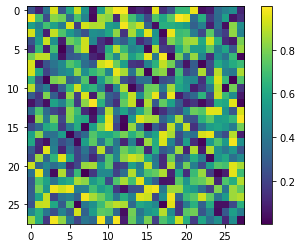

In [1220]:
plt.figure()
plt.imshow(randx.data.cpu()[0][0])#) - hallucx.data.cpu()[1][0])
plt.colorbar()
plt.show()

<BarContainer object of 10 artists>

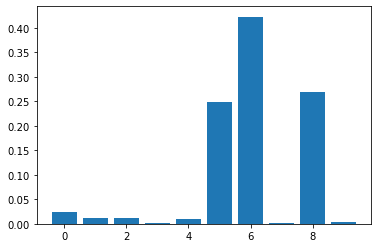

In [1221]:
y = torch.zeros((mbs, 10))
neurons = model.init_neurons(mbs, device)
backneurons = model(randx, y, neurons, 100, beta=0.0)
out = F.softmax(model.synapses[-1](backneurons[-1].view(mbs,-1)), dim=1)
plt.bar(range(model.nc), out[0].data.cpu())

# test the model's classification

In [1201]:
import torchvision

In [1202]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                            torchvision.transforms.Normalize(mean=(0.0,), std=(1.0,))])

mnist_dset_train = torchvision.datasets.MNIST('./mnist_pytorch', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=mbs, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('./mnist_pytorch', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=200, shuffle=False, num_workers=0)

In [1549]:
x1, y1 = next(iter(train_loader))
x1 = x1.to(device)
y1 = y1.to(device)

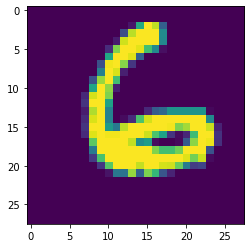

In [1550]:
plt.imshow(x1[1][0].data.cpu())

<BarContainer object of 10 artists>

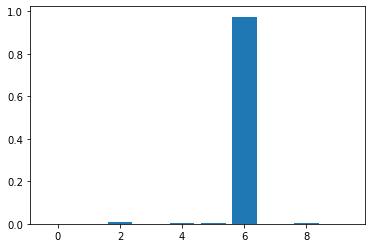

In [1551]:
y = torch.zeros((mbs, 10))
neurons = model.init_neurons(mbs, device)
neurons = model(x1, y, neurons, 100, beta=0.0)
out = F.softmax(model.synapses[-1](neurons[-1].view(mbs,-1)), dim=1)
plt.bar(range(model.nc), out[1].data.cpu())

# test the autoassociative memory features, allowing it to complete the input while generating

In [1553]:
from copy import deepcopy

In [1554]:
xobscured = deepcopy(x1)
mask = torch.ones_like(x1)
mask[:,:,:,14:] = 0.0
xobscured *= mask
xobscured.requires_grad=True

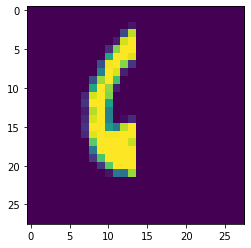

In [1555]:
plt.imshow(xobscured[1][0].data.cpu())

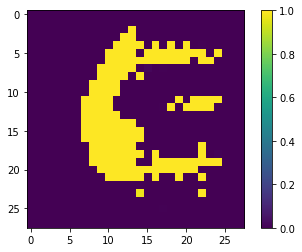

In [1556]:
y = torch.zeros((mbs, 10))
neurons = model.init_neurons(mbs, device)
completedx, neurons = forwardmutatex(model, xobscured, y, neurons, 100, beta=0.0)
plt.imshow(completedx[1][0].data.cpu())
plt.colorbar()

<BarContainer object of 10 artists>

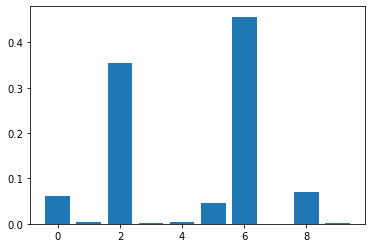

In [1557]:
out = F.softmax(model.synapses[-1](neurons[-1].view(mbs,-1)), dim=1)
plt.bar(range(model.nc), out[1].data.cpu())

## the reconstruction is pretty bad.
What if we initialized with the hidden state from identifying the full digit, would it put it together thaen?

<BarContainer object of 10 artists>

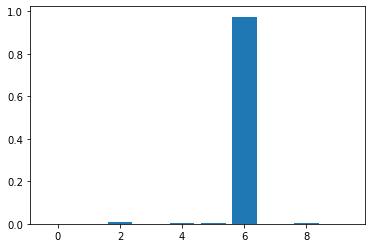

In [1558]:
y = torch.zeros((mbs, 10))
neurons = model.init_neurons(mbs, device)
neurons = model(x1, y, neurons, 100, beta=0.0)
out = F.softmax(model.synapses[-1](neurons[-1].view(mbs,-1)), dim=1)
plt.bar(range(model.nc), out[1].data.cpu())

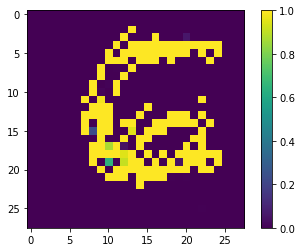

In [1559]:
y = torch.zeros((mbs, 10))
# skip init neurons, keep the previous values
# neurons = model.init_neurons(mbs, device)
completedx, neurons = forwardmutatex(model, xobscured, y, neurons, 100, beta=0.0)
plt.imshow(completedx[1][0].data.cpu())
plt.colorbar()

<BarContainer object of 10 artists>

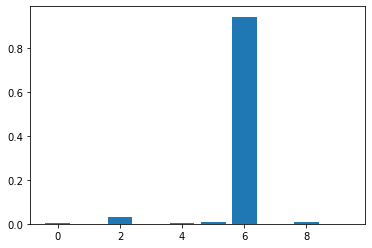

In [1560]:
out = F.softmax(model.synapses[-1](neurons[-1].view(mbs,-1)), dim=1)
plt.bar(range(model.nc), out[1].data.cpu())

# its able to reconstruct the input much better
and keep the correct classification
what if the input was entirely obscured?

<BarContainer object of 10 artists>

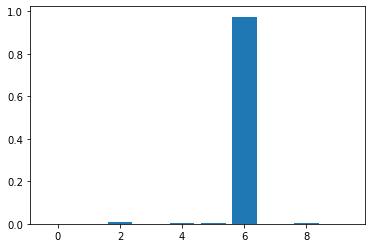

In [1561]:
# first run, with the input
y = torch.zeros((mbs, 10))
neurons = model.init_neurons(mbs, device)
neurons = model(x1, y, neurons, 100, beta=0.0)
out = F.softmax(model.synapses[-1](neurons[-1].view(mbs,-1)), dim=1)
plt.bar(range(model.nc), out[1].data.cpu())

In [1562]:
mask = torch.ones_like(x1)
mask[:,:,:,14:] = 0.0

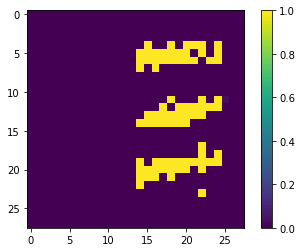

In [1566]:
# hide the input
xnone = 0.0 * x1
xnone.requires_grad=True
y = torch.zeros((mbs, 10))
# skip init neurons, keep the previous values
# neurons = model.init_neurons(mbs, device)
completedx, neurons = forwardmutatex(model, xnone, y, neurons, 100, beta=0.0)
plt.imshow(completedx[1][0].data.cpu())
plt.colorbar()

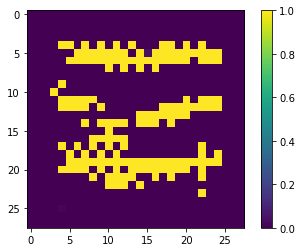

In [1568]:
mask *= 0.0
completedx, neurons = forwardmutatex(model, xnone, y, neurons, 100, beta=0.0)
plt.imshow(completedx[1][0].data.cpu())
plt.colorbar()

In [1570]:
torch.nn.CrossEntropyLoss(reduction='none')(completedx, x1).squeeze()

tensor([[[-0., -0., -0.,  ..., -0., -0., -0.],
         [-0., -0., -0.,  ..., -0., -0., -0.],
         [-0., -0., -0.,  ..., -0., -0., -0.],
         ...,
         [-0., -0., -0.,  ..., -0., -0., -0.],
         [-0., -0., -0.,  ..., -0., -0., -0.],
         [-0., -0., -0.,  ..., -0., -0., -0.]],

        [[-0., -0., -0.,  ..., -0., -0., -0.],
         [-0., -0., -0.,  ..., -0., -0., -0.],
         [-0., -0., -0.,  ..., -0., -0., -0.],
         ...,
         [-0., -0., -0.,  ..., -0., -0., -0.],
         [-0., -0., -0.,  ..., -0., -0., -0.],
         [-0., -0., -0.,  ..., -0., -0., -0.]]], device='cuda:0',
       grad_fn=<SqueezeBackward0>)

# when we remove the energy term, it goes back to the original 2!
somehow a force term actually offsets the neurons in state space in a semantic way: the input is still very much a 2. without this force vector it can return to normal (the original state was not altered significantly)

In [1421]:
model.__class__, model.softmax

(model_utils.P_CNN, True)

main.py --model CNN --task MNIST --channels 32 64 --kernels 5 5 --pools mm --strides 1 1 --fc 10 --optim adam --lrs 5e-5 1e-5 8e-6 --epochs 10 --act hard_sigmoid --todo train --betas 0.0 0.4 --T1 100 --T2 10 --mbs 100 --device 0 --save --seed 710610 --loss cel --softmax 

('CNN',) softmax


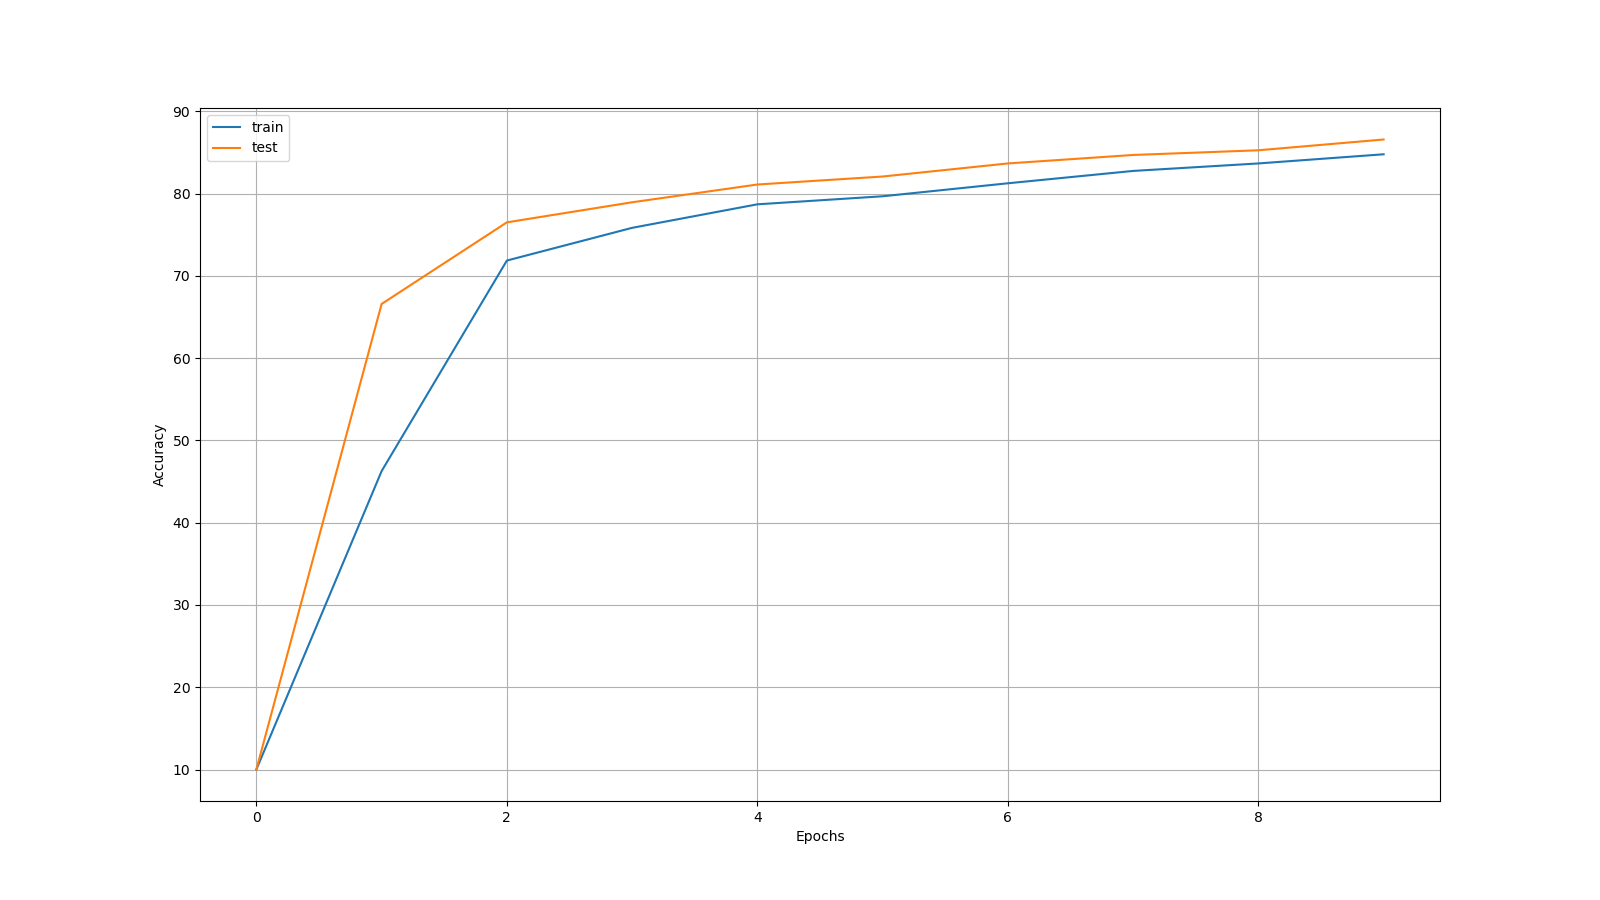

In [19]:
showtest(pathcel, testscel[0])

main.py --model CNN --task MNIST --channels 32 64 --kernels 5 5 --pools mm --strides 1 1 --fc 10 --optim adam --lrs 5e-5 1e-5 8e-6 --epochs 10 --act hard_sigmoid --todo train --betas 0.0 0.4 --T1 100 --T2 10 --mbs 100 --device 0 --save --seed 710610 --loss cel 

('CNN',)


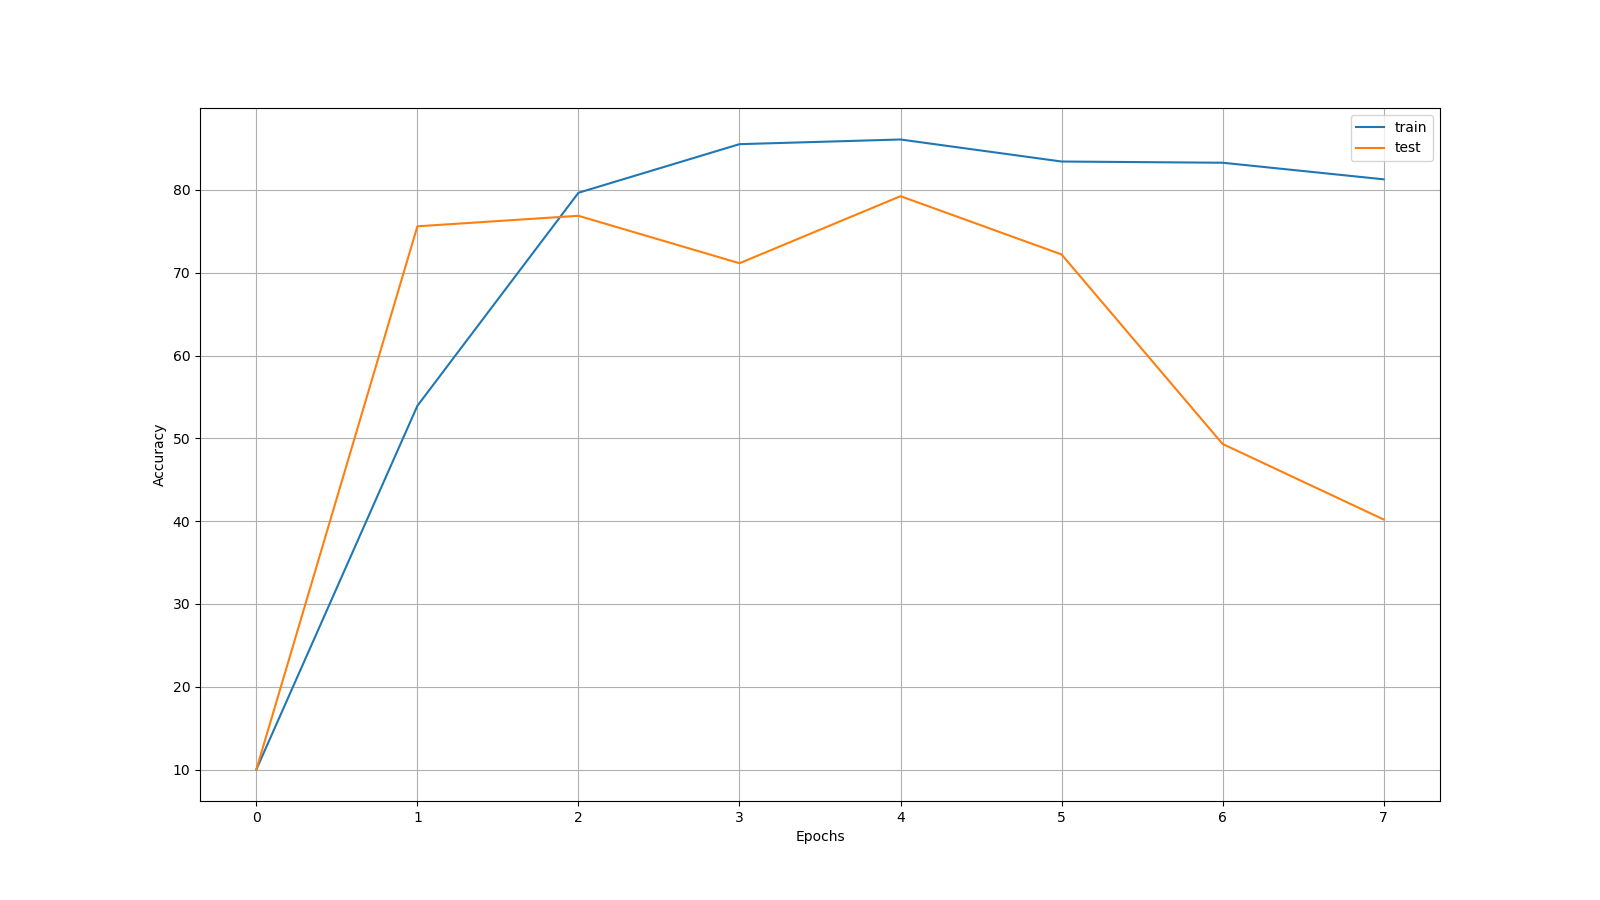

In [20]:
showtest(pathcel, testscel[1])

main.py --model LatSoftCNN --task MNIST --channels 32 64 --kernels 5 5 --pools mm --strides 1 1 --fc 10 --optim adam --lrs 5e-5 1e-5 8e-6 --epochs 10 --act hard_sigmoid --todo train --betas 0.0 0.4 --T1 100 --T2 10 --mbs 100 --device 0 --save --seed 710610 --loss cel 

('LatSoftCNN',)


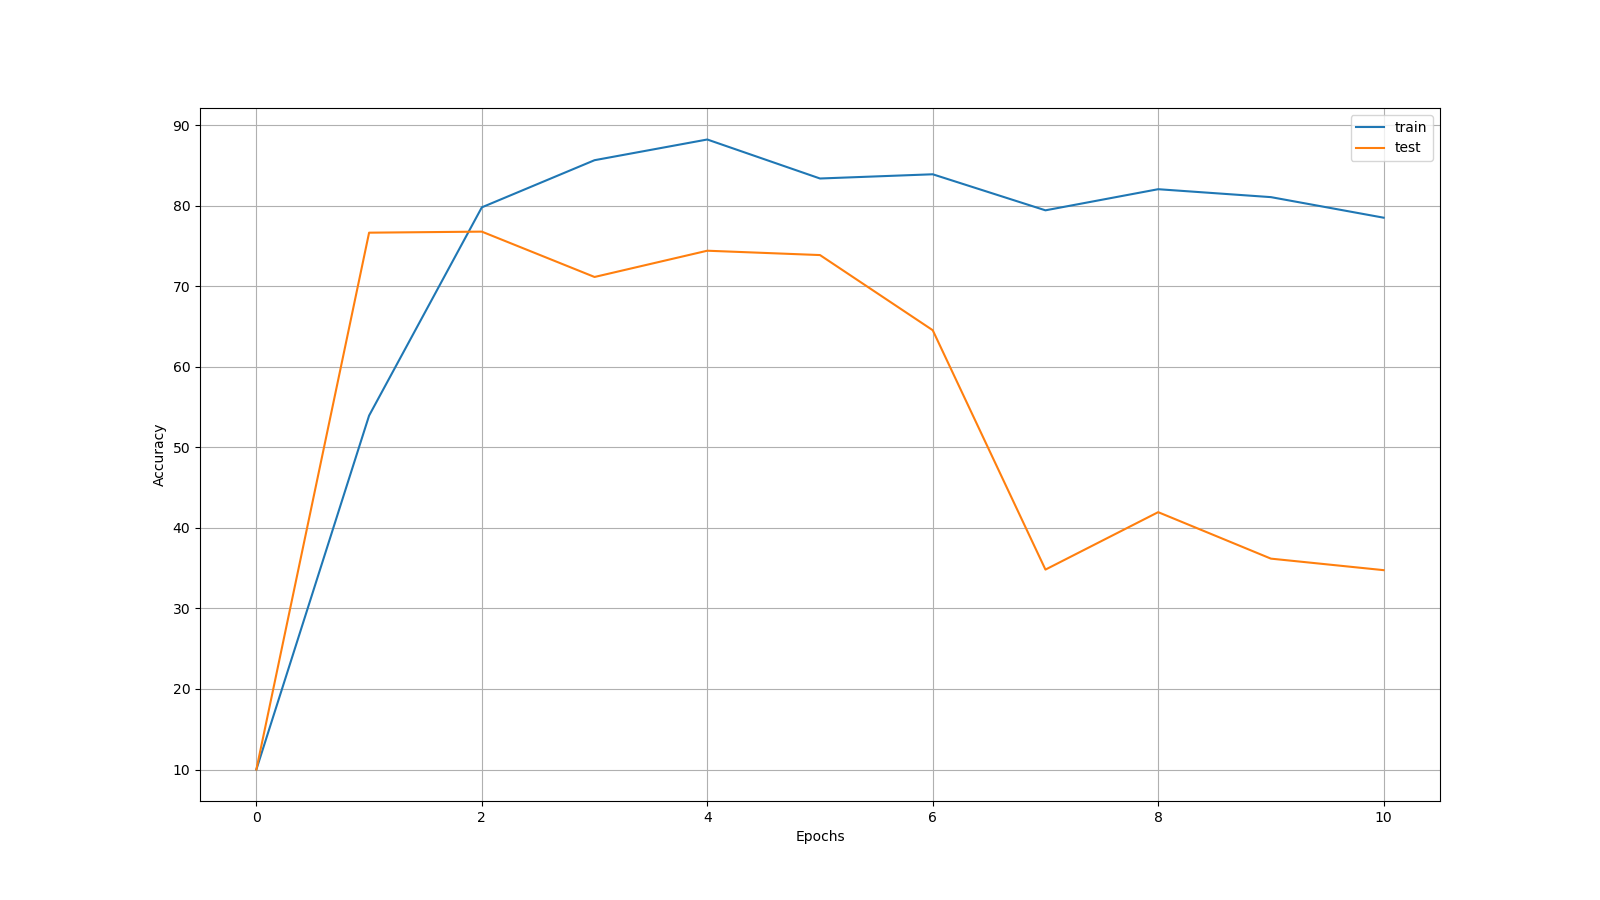

In [22]:
showtest(pathcel, testscel[2])

main.py --model CNN --task MNIST --channels 32 64 --kernels 5 5 --pools mm --strides 1 1 --fc 10 --optim adam --lrs 5e-5 1e-5 8e-6 --epochs 10 --act hard_sigmoid --todo train --betas 0.0 0.4 --T1 100 --T2 10 --mbs 100 --device 0 --save --seed 710610 --loss mse --softmax 

('CNN',) softmax


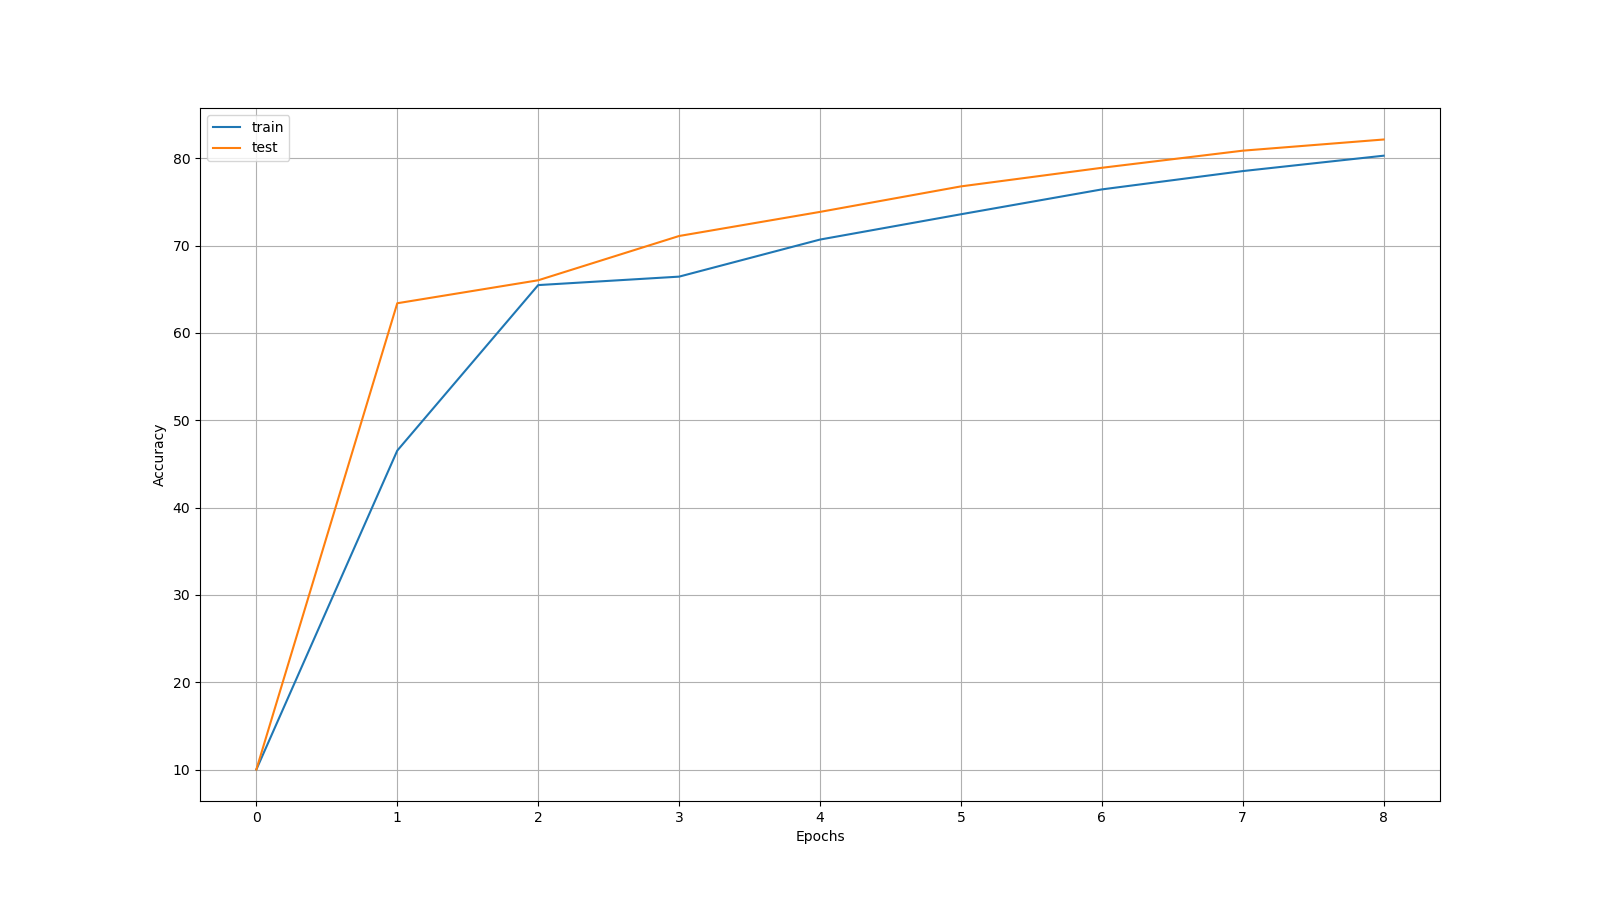

In [25]:
showtest(pathmse, testsmse[0])

main.py --model CNN --task MNIST --channels 32 64 --kernels 5 5 --pools mm --strides 1 1 --fc 10 --optim adam --lrs 5e-5 1e-5 8e-6 --epochs 10 --act hard_sigmoid --todo train --betas 0.0 0.4 --T1 100 --T2 10 --mbs 100 --device 0 --save --seed 710610 --loss mse 

('CNN',)


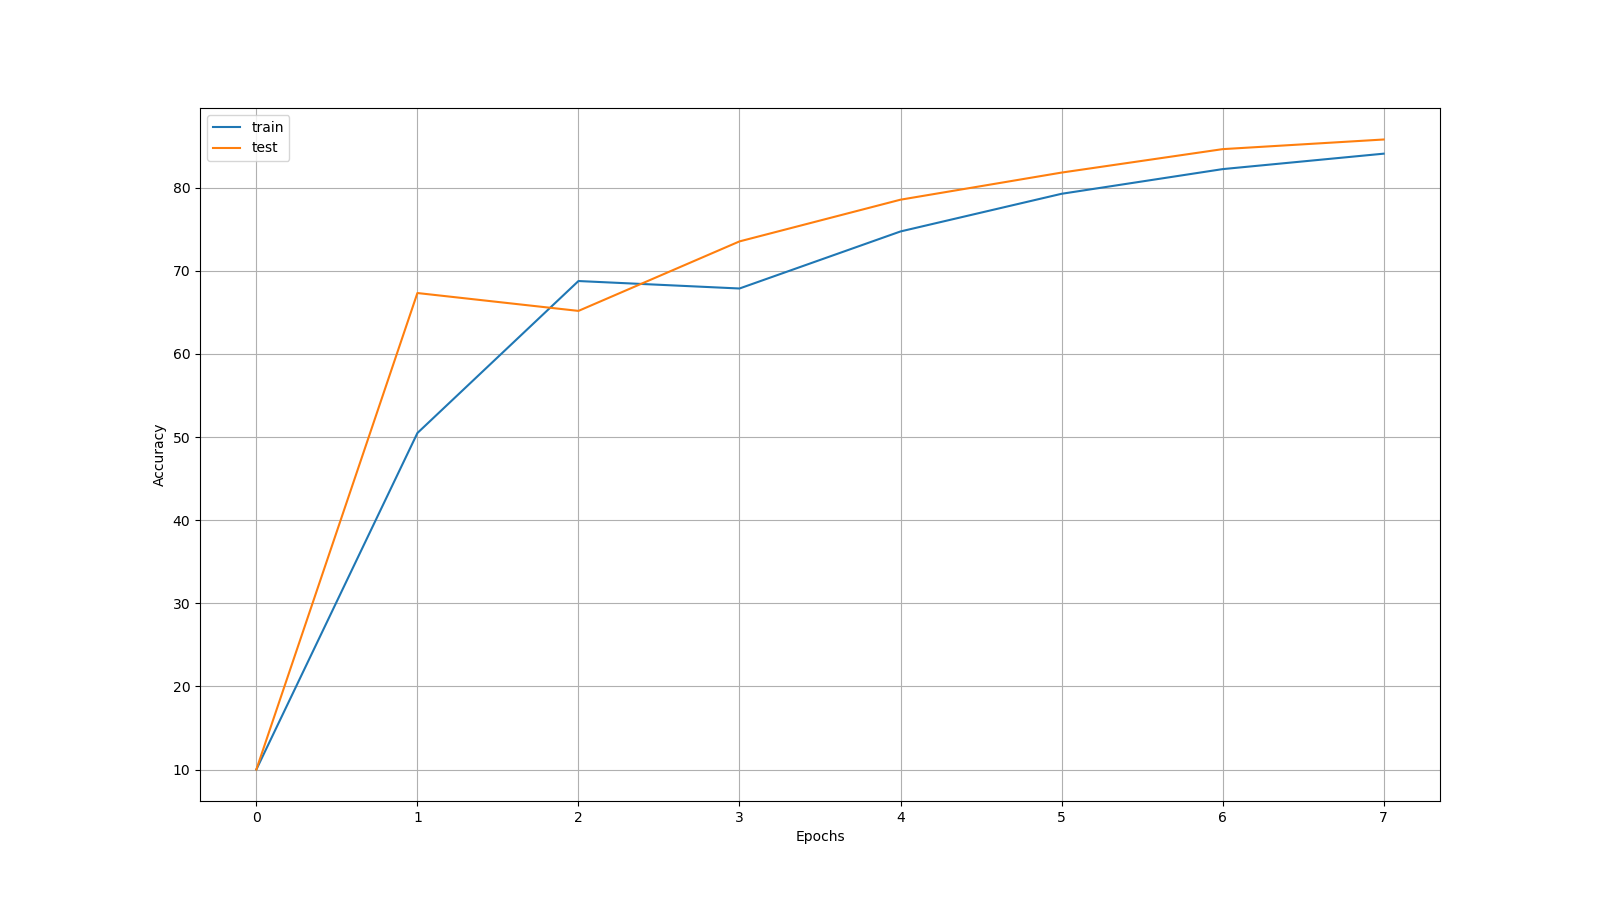

In [24]:
showtest(pathmse, testsmse[1])

main.py --model LatSoftCNN --task MNIST --channels 32 64 --kernels 5 5 --pools mm --strides 1 1 --fc 10 --optim adam --lrs 5e-5 1e-5 8e-6 --epochs 10 --act hard_sigmoid --todo train --betas 0.0 0.4 --T1 100 --T2 10 --mbs 100 --device 0 --save --seed 710610 --loss mse 

('LatSoftCNN',)


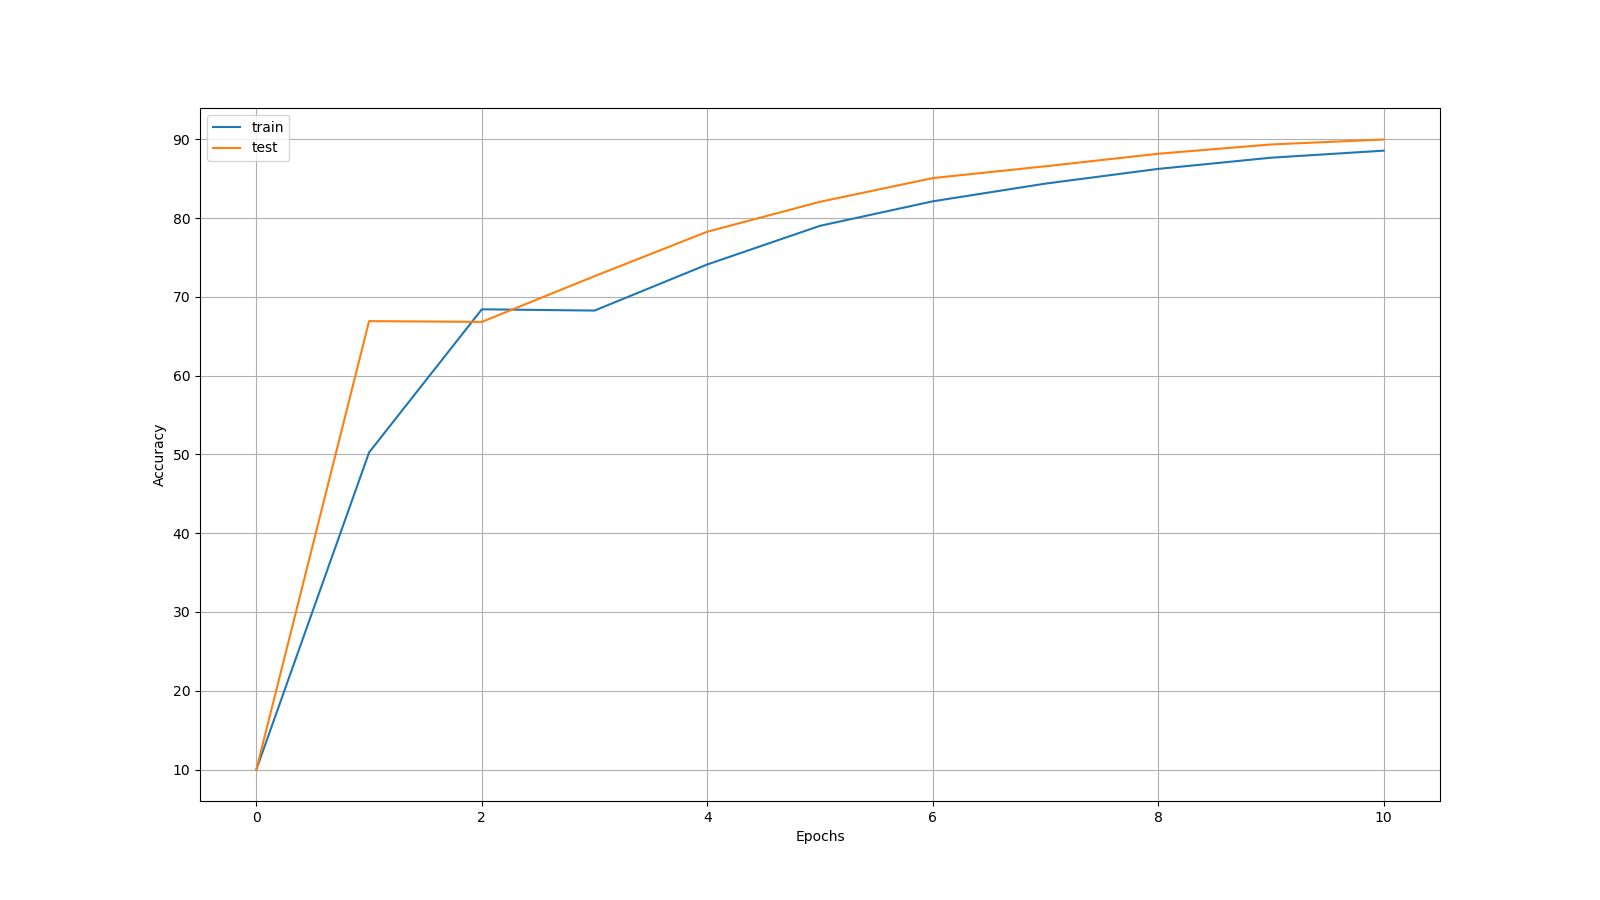

In [23]:
showtest(pathmse, testsmse[2])

In [32]:
os.listdir(pathmse + tests[1])

FileNotFoundError: [Errno 2] No such file or directory: 'results/EP/mse/2023-07-10/19-55-15_gpu0/'

In [35]:
os.listdir(pathmse)

['latsoftcnn1',
 '09-51-37_gpu0',
 '09-56-13_gpu1',
 '19-17-40_gpu0',
 '19-18-15_gpu0',
 '11-10-17_gpu0',
 '20-12-47_gpu0',
 'pcnn_softmax_1',
 '11-05-45_gpu0',
 '09-55-26_gpu0',
 '19-55-16_gpu0',
 '09-49-55_gpu0',
 '19-37-45_gpu0',
 '11-14-25_gpu1',
 '09-47-50_gpu0',
 'secondhalfdecision_fakesoft_cnn',
 '09-47-12_gpu0',
 '09-49-08_gpu0']